In [1]:
#
# uso base 
# uso o sklearn
# saber usar o kaggle
# Não precisa discretizar..mas pode discritzar...tem que avaliar usando cross-validation
# 

# ************** DATA MANIPULATION *****************
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#sKLEARN VERSION: 0.19.1
# SKLEARN PREPROCESS
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.utils import resample


#*****************TRAINING*************************
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier


# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#****************************************************

# READING THE DATA
header_list = ["age","workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
labels_set = {}
labels_set["workclass"] = [ "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"]
labels_set["education"] = ["Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"]
labels_set["marital-status"] = ["Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"]
labels_set["occupation"] = ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving","Priv-house-serv", "Protective-serv", "Armed-Forces"]
labels_set["relationship"] = ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"]
labels_set["race"] = [ "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"]
labels_set["sex"] = [ "Female", "Male"]
labels_set["native-country"] = ["United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]
labels_set["income"] = [">50K", "<=50K"]

#source: https://archive.ics.uci.edu/ml/datasets/adult
df = pd.read_csv('./adult.data', names=header_list) # Adult Data base
df_test = pd.read_csv('./adult.test', names=header_list) #adult data base test
# SUMMARY:
print('Income count (train):')
print(df['income'].value_counts())

print('Income count(test):')
print(df_test['income'].value_counts())
df.head()

Income count (train):
 <=50K    24720
 >50K      7841
Name: income, dtype: int64
Income count(test):
 <=50K.    12435
 >50K.      3846
Name: income, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


  age  workclass  fnlwgt  education education-num  marital-status  occupation  \
0  39        5.0   77516        0.0            13             2.0         8.0   
1  50        1.0   83311        0.0            13             0.0         4.0   
2  38        0.0  215646        3.0             9             1.0         6.0   
3  53        0.0  234721        2.0             7             0.0         6.0   
4  28        0.0  338409        0.0            13             0.0         5.0   

   relationship  race  sex capital-gain capital-loss hours-per-week  \
0           3.0   0.0  1.0         2174            0             40   
1           2.0   0.0  1.0            0            0             13   
2           3.0   0.0  1.0            0            0             40   
3           2.0   4.0  1.0            0            0             40   
4           0.0   4.0  0.0            0            0             40   

   native-country  income  
0             0.0     1.0  
1             0.0     1.0  
2 

C:\ProgramData\Anaconda3\envs\trabalho_ia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


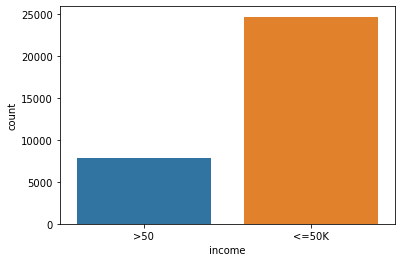

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,0.0,226802.0,2.0,7.0,2.0,7.0,1.0,4.0,1.0,0.0,0.0,40.0,0.0,1.0
2,38,0.0,89814.0,3.0,9.0,0.0,9.0,2.0,0.0,1.0,0.0,0.0,50.0,0.0,1.0
3,28,4.0,336951.0,5.0,12.0,0.0,12.0,2.0,0.0,1.0,0.0,0.0,40.0,0.0,0.0
4,44,0.0,160323.0,1.0,10.0,0.0,7.0,2.0,4.0,1.0,7688.0,0.0,40.0,0.0,0.0
5,18,0.0,103497.0,1.0,10.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0


In [2]:
# HANDLE THE DATA SET
# 1) Eliminate blank spaces on data strings 
for key in labels_set:
    df[key] = df[key].str.strip()
    df_test[key] = df_test[key].str.strip()

# 2) Replace ? data to NaN
df= df.replace("?", np.nan)
df_test = df_test.replace("?", np.nan)
#df.info()

# Handle test data
df_test = df_test.drop([0],axis=0) #drop first row
df_test['income'] = df_test['income'].replace('>50K.','>50K')
df_test['income'] = df_test['income'].replace('<=50K.','<=50K')


# 3) IMPUTATION: replace the missing values to the most frequently 
imp = SimpleImputer(strategy="most_frequent")
df_values = imp.fit_transform(df.values) # data values
df = pd.DataFrame(df_values, index=df.index, columns = df.columns)

df_values = imp.fit_transform(df_test.values) # data values
df_test = pd.DataFrame(df_values, index=df_test.index, columns = df_test.columns)

# 4) ENCODING DATA: encoding strings features to intergers using OrdinalEncoder

labels_encoded = {} #store the encoder used for each column
for key in labels_set:
    enc = OrdinalEncoder(categories=[labels_set[key]])
    df[key] = enc.fit_transform(df[key].to_numpy().reshape(-1, 1)) # fit and transformthe label encoder avaliable on labes_set[key]
    df_test[key] = enc.fit_transform(df_test[key].to_numpy().reshape(-1, 1)) # encoding data test
    labels_encoded[key] = enc

print(df.head())

#PLOT INCOME COUNTS
g = sns.countplot(df['income'])
g.set_xticklabels(['>50','<=50K'])
plt.show()
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030671,3.007999,-1.063611,-0.983086,1.134739,0.778149,1.124493,0.500340,-0.379361,0.703071,0.148453,-0.21666,-0.035429,-0.265459,1.0
1,0.837109,0.212749,-1.008707,-0.983086,1.134739,-0.908868,-0.259593,-0.307774,-0.379361,0.703071,-0.145920,-0.21666,-2.222153,-0.265459,1.0
2,-0.042642,-0.486063,0.245079,-0.116445,-0.420060,-0.065360,0.432450,0.500340,-0.379361,0.703071,-0.145920,-0.21666,-0.035429,-0.265459,1.0
3,1.057047,-0.486063,0.425801,-0.405325,-1.197459,-0.908868,0.432450,-0.307774,2.921203,0.703071,-0.145920,-0.21666,-0.035429,-0.265459,1.0
4,-0.775768,-0.486063,1.408176,-0.983086,1.134739,-0.908868,0.086428,-1.924002,2.921203,-1.422331,-0.145920,-0.21666,-0.035429,1.886344,1.0


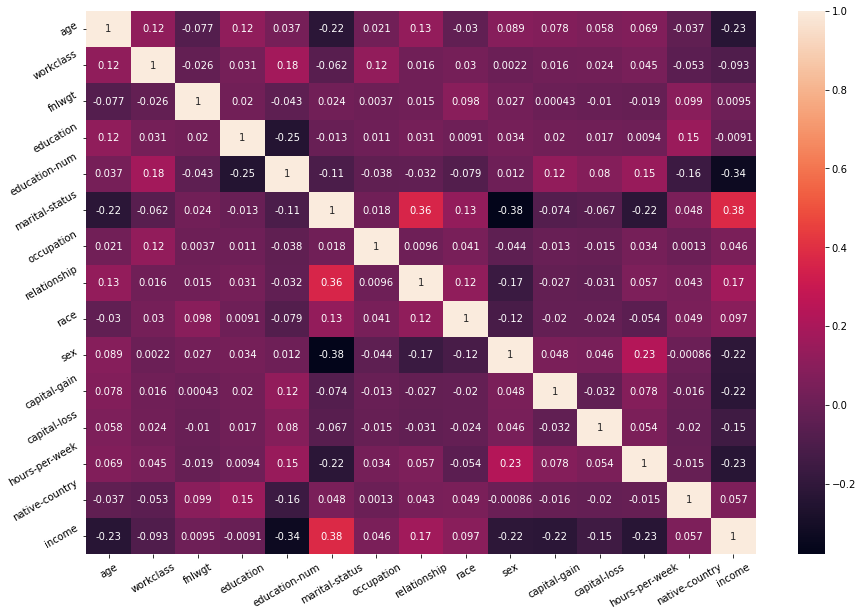

In [19]:
# SPLIT TRAIN-TEST DATA, 80/20;
X_train = df.drop(['income'],axis=1)
Y_train = df['income']

X_test = df_test.drop(['income'],axis=1)
Y_test = df_test['income']

# SCALING DATASET:
# SCALER
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train['income'] = Y_train

# CORRELATION MAP
corr = X_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
X_train.head()
#X_train = X_train.drop(['income'],axis=1)
#plt.show()


Feature Selection (7 selected)
-------------------------------------------------
Features Selected:
['education' 'education-num' 'relationship' 'sex' 'capital-gain'
 'capital-loss' 'hours-per-week']
-------------------------------------------------

KNN Classifier: selecting best parameter K
[0.81345002 0.81956388 0.82463145 0.82493857 0.83000614]
K = 3; Accuracy: 0.82 (+/- 0.01)
[0.8066943  0.80850737 0.81418919 0.81756757 0.82017813]
K = 4; Accuracy: 0.81 (+/- 0.01)
[0.82389068 0.82724201 0.83046683 0.83707002 0.83338452]
K = 5; Accuracy: 0.83 (+/- 0.01)
[0.82051282 0.82217445 0.82447789 0.83292383 0.83108108]
K = 6; Accuracy: 0.83 (+/- 0.01)
[0.82465838 0.83062039 0.83338452 0.84229115 0.8379914 ]
K = 7; Accuracy: 0.83 (+/- 0.01)
[0.82389068 0.8277027  0.83031327 0.83584152 0.8355344 ]
K = 8; Accuracy: 0.83 (+/- 0.01)
[0.82911101 0.83476658 0.83277027 0.84121622 0.84152334]
K = 9; Accuracy: 0.84 (+/- 0.01)
[0.82527253 0.83246314 0.83230958 0.83937346 0.83845209]
K = 10; Accuracy: 0.

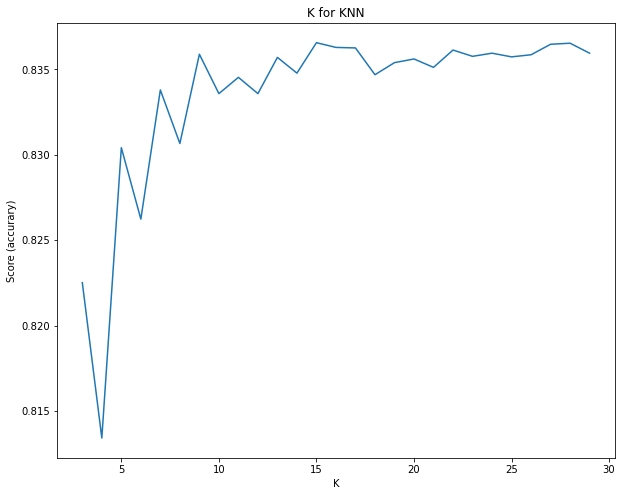

-------------------------------------------------

KNN Classifier using all features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8395675941281248
Recall (Tp/(Tp+Fn): 0.9192601527945315
Precision(Tp/(Tp+Fp)): 0.8766776593297032
Report:
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63      3846
         1.0       0.88      0.92      0.90     12435

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281

-------------------------------------------------



In [4]:
#FEATURE SELECTION: (comentar que esse metodo de selecao demora muito....)
# A correlação entre as features indicou que 6/7
print("Feature Selection (7 selected)")
print("-------------------------------------------------")
"""
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn,  n_features_to_select=7, direction='forward')
sfs = sfs.fit(X_train, Y_train)
sfs_mask = sfs.get_support()
"""
print(f"Features Selected:")
#Bypass
sfs_mask = np.array([False, False, False, True, True, False, False, True, False, True, True, True, True, False ])
print(np.array(header_list[:-1])[sfs_mask])


#> RESULT:
#["age","workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex", "capital-gain","capital-loss","hours-per-week","native-country"]
# Result = ['education' 'education-num' 'relationship' 'sex' 'capital-gain' 'capital-loss' 'hours-per-week']


print("-------------------------------------------------\n")

# TRAINING USING KNN AND CROSS-VALIDATION
print("KNN Classifier: selecting best parameter K")
best_k = 0
best_mean = 0

dic_cv = {"score":[], "param":[]}

for k in range(3,30): # k = [3,21]
    knn = KNeighborsClassifier(n_neighbors=k)
    scores  = cross_val_score(knn, X_train, Y_train, cv=5)
    print(scores)
    mmean = scores.mean()
    dic_cv["score"].append(mmean)
    dic_cv["param"].append(k)

    print("K = %d; Accuracy: %0.2f (+/- %0.2f)" % (k, mmean, scores.std() * 2))
    if mmean > best_mean:
        best_k = k
        best_mean = mmean
#best_k = 9, 15
print(f"Best K = {best_k}")

def print_CV_Score(x_axis, y_axis,x_label, y_label, _title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(_title)
    ax.plot(x_axis, y_axis)
    plt.show()
    
print_CV_Score(dic_cv["param"],dic_cv["score"],"K", "Score (accurary)", "K for KNN")
    
print("-------------------------------------------------\n")

print("KNN Classifier using all features")
print("-------------------------------------------------")
# Accuracy report
def statistic_Report(ytest,ypred):
    acc_score = accuracy_score(ytest, ypred)
    rec_score = recall_score(ytest,ypred)
    prec_score = precision_score(ytest,ypred)
    #INSERIR UM DESCRITIVO DE ACCURACY...BASEADO NOS TN, FN.
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    print("REPORT:")
    print("-------------------------------------------------\n")
    print(f"Accuracy (true/all): {acc_score}")
    print(f"Recall (Tp/(Tp+Fn): {rec_score}")
    print(f"Precision(Tp/(Tp+Fp)): {prec_score}")
    print("Report:")
    print(classification_report(ytest, ypred))
    print("-------------------------------------------------\n")


#KNN classifier: 
def KNN_classifier(X, y, Xtest, ytest, best_k):
    knn = KNeighborsClassifier(n_neighbors=best_k) #knn using the best K
    knn.fit(X,y)
    Y_pred = knn.predict(Xtest)
    statistic_Report(ytest,Y_pred)

KNN_classifier(X_train, Y_train, X_test, Y_test, best_k)

In [5]:
print("KNN Classifier: selected features")
print("-------------------------------------------------")
X_train_sel = X_train.loc[:, sfs_mask]
X_test_sel = X_test.loc[:, sfs_mask]

KNN_classifier(X_train_sel, Y_train, X_test_sel, Y_test, best_k)


KNN Classifier: selected features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8440513481972852
Recall (Tp/(Tp+Fn): 0.9263369521511862
Precision(Tp/(Tp+Fp)): 0.8765028154010044
Report:
              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64      3846
         1.0       0.88      0.93      0.90     12435

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281

-------------------------------------------------



In [6]:
# BALANCED DATASET
#source: https://elitedatascience.com/imbalanced-classes
print("KNN Classifier: Using selected features and balanced data")
print("Balanced data using resample: UPSAMPLE de minority class")
print("-------------------------------------------------")
X_train_sel.loc[:,'income'] = Y_train
nsamples = X_train_sel['income'].value_counts()
X_train_majority = X_train_sel[X_train_sel['income']==1 ] # <= 50K
X_train_minority = X_train_sel[X_train_sel['income']==0 ] # > 50K
X_train_sel = X_train_sel.drop(['income'],axis=1)

# Upsample minority class
X_train_minority_upsampled = resample(X_train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples[1],    # to match majority class
                                 random_state=123) # reproducible results
X_train_sel_upsampled = pd.concat([X_train_majority, X_train_minority_upsampled])

print(X_train_sel_upsampled['income'].value_counts())

Y_train_upsampled = X_train_sel_upsampled['income']
X_train_sel_upsampled = X_train_sel_upsampled.drop(['income'], axis=1)

# Apply KNN
KNN_classifier(X_train_sel_upsampled, Y_train_upsampled, X_test_sel, Y_test, best_k)


print("\nKNN Classifier: Using selected features and balanced data")
print("Balanced data using resample: DOWNSAMPLE de majority class")
print("-------------------------------------------------")

# Downsample minority class
X_train_majority_downsampled = resample(X_train_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=nsamples[0],    # to match minority class
                                 random_state=123) # reproducible results
X_train_sel_downsampled = pd.concat([X_train_majority_downsampled, X_train_minority])
print(X_train_sel_downsampled['income'].value_counts())
Y_train_downsampled = X_train_sel_downsampled['income']
X_train_sel_downsampled = X_train_sel_downsampled.drop(['income'], axis=1)

# Apply KNN
KNN_classifier(X_train_sel_downsampled, Y_train_downsampled, X_test_sel, Y_test, best_k)

KNN Classifier: Using selected features and balanced data
Balanced data using resample: UPSAMPLE de minority class
-------------------------------------------------


C:\Users\hrh5\AppData\Local\Temp\ipykernel_16932\2738314267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel.loc[:,'income'] = Y_train


1.0    24720
0.0    24720
Name: income, dtype: int64
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.811068116209078
Recall (Tp/(Tp+Fn): 0.9433856051467632
Precision(Tp/(Tp+Fp)): 0.8318088349996454
Report:
              precision    recall  f1-score   support

         0.0       0.68      0.38      0.49      3846
         1.0       0.83      0.94      0.88     12435

    accuracy                           0.81     16281
   macro avg       0.75      0.66      0.69     16281
weighted avg       0.80      0.81      0.79     16281

-------------------------------------------------


KNN Classifier: Using selected features and balanced data
Balanced data using resample: DOWNSAMPLE de majority class
-------------------------------------------------
1.0    7841
0.0    7841
Name: income, dtype: int64
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8048645660585959
Recall (Tp/(Tp+Fn): 0.9100924809006835
Precision(Tp/(Tp+Fp)): 0.


 Decision Tree Classifier: Using standard data train Set
-------------------------------------------------
Select Hyperparameter: best depth
Best depth: 9


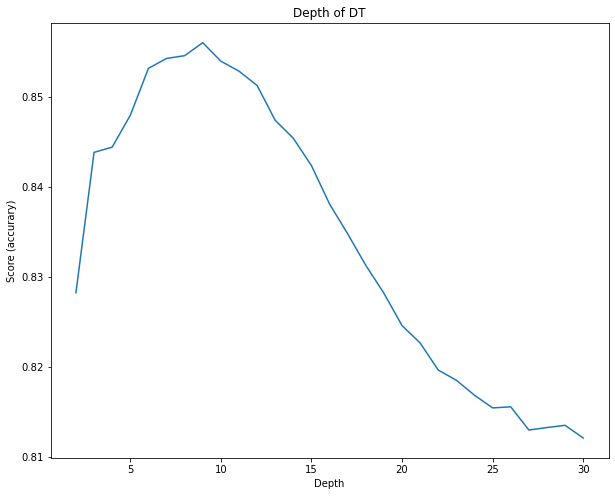

REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8575026104047663
Recall (Tp/(Tp+Fn): 0.9319662243667068
Precision(Tp/(Tp+Fp)): 0.8871622138865498
Report:
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67      3846
         1.0       0.89      0.93      0.91     12435

    accuracy                           0.86     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

-------------------------------------------------


 Decision Tree Classifier: Using Selected Features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8566427123641054
Recall (Tp/(Tp+Fn): 0.9541616405307599
Precision(Tp/(Tp+Fp)): 0.8705701078582434
Report:
              precision    recall  f1-score   support

         0.0       0.79      0.54      0.64      3846
         1.0       0.87      0.95  

In [7]:
# APPLY OTHERS CLASSIFIERS
#1) Daqui em diante serão utilizados a base de dados com dados  originais e com seleção de features
#2) Utilizar a base para configurar os hyperparameter usando cross-validation
#3) Testar usando a base de dados
#4) Apresentar a estatística

# DECISION TREE CLASSIFIER:
print("\n Decision Tree Classifier: Using standard data train Set")
print("-------------------------------------------------")
print("Select Hyperparameter: best depth")

best_depth = 0
best_mean = 0
dic_cv = {"score":[], "param":[]}

for d in range(2,31): # max depth = [2,30]
    tree_clf = DecisionTreeClassifier(random_state=0, max_depth = d)
    scores  = cross_val_score(tree_clf, X_train, Y_train, cv=5)
    mmean = scores.mean()
    dic_cv["score"].append(mmean)
    dic_cv["param"].append(d)

    #print("Depth = %d; Accuracy: %0.2f (+/- %0.2f)" % (d, mmean, scores.std() * 2))
    if mmean > best_mean:
        best_depth = d
        best_mean = mmean

print(f"Best depth: {best_depth}")
print_CV_Score(dic_cv["param"],dic_cv["score"],"Depth", "Score (accurary)", "Depth of DT")

tree_clf = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
tree_clf.fit(X_train,Y_train)
Y_pred = tree_clf.predict(X_test)
statistic_Report(Y_test,Y_pred)


print("\n Decision Tree Classifier: Using Selected Features")
print("-------------------------------------------------")
tree_clf = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
tree_clf.fit(X_train_sel,Y_train)
Y_pred = tree_clf.predict(X_test_sel)
statistic_Report(Y_test,Y_pred)


In [8]:
# NAIVE BAYES:
print("\n Gaussian Naive Bayes: Using standard data train Set")
print("-------------------------------------------------")
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
statistic_Report(Y_test,Y_pred)


print("\n Gaussian Naive Bayes: Using selected features")
print("-------------------------------------------------")
gnb = GaussianNB()
gnb.fit(X_train_sel, Y_train)
Y_pred = gnb.predict(X_test_sel)
statistic_Report(Y_test,Y_pred)


 Gaussian Naive Bayes: Using standard data train Set
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8164731896075179
Recall (Tp/(Tp+Fn): 0.9423401688781665
Precision(Tp/(Tp+Fp)): 0.8376581599828437
Report:
              precision    recall  f1-score   support

         0.0       0.69      0.41      0.51      3846
         1.0       0.84      0.94      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.76      0.68      0.70     16281
weighted avg       0.80      0.82      0.80     16281

-------------------------------------------------


 Gaussian Naive Bayes: Using selected features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.7971869049812665
Recall (Tp/(Tp+Fn): 0.9491757137112987
Precision(Tp/(Tp+Fp)): 0.8155185517860845
Report:
              precision    recall  f1-score 

In [9]:
#SUPORT VECTOR MACHINE
# Using gridSearchCV to choose the best classifier parameters
print("\n SUPORT VECTOR MACHINE: Tuning using seleted data")
print("-------------------------------------------------")
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03]} 
              ]
print("Tuning parameters: BYPASSED...TOO SLOW!")
"""
svc = svm.SVC()
grid_search = GridSearchCV(estimator = svc, param_grid = parameters,scoring = 'accuracy',cv = 5)

grid_search.fit(X_train_sel,Y_train)
df_result = pd.DataFrame.from_dict(grid_search.cv_results_)

print("Exportando resultado para svm_tuning.csv...")
df_result.to_csv("svm_tuning.csv") 
df_result.head()"""
print("Best parameters:")
best_params = {'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
print(best_params)
print("-------------------------------------------------")
print("\n SUPORT VECTOR MACHINE: Using original data")
print("-------------------------------------------------")
svc = svm.SVC(C = best_params['C'], kernel = best_params['kernel'],gamma = best_params['gamma'])
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
statistic_Report(Y_test,Y_pred)
# O resulado tem sido muito lento. com tempo de execução muito maior do que os outros metodos..
#apenas esse treinamento tem demorado minutos para gerar o resultado.


print("\n SUPORT VECTOR MACHINE: Using Selected Features")
print("-------------------------------------------------")
svc.fit(X_train_sel, Y_train)
Y_pred = svc.predict(X_test_sel)
statistic_Report(Y_test,Y_pred)


 SUPORT VECTOR MACHINE: Tuning using seleted data
-------------------------------------------------
Tuning parameters: BYPASSED...TOO SLOW!
Best parameters:
{'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
-------------------------------------------------

 SUPORT VECTOR MACHINE: Using original data
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8315214053190836
Recall (Tp/(Tp+Fn): 0.9151588258946521
Precision(Tp/(Tp+Fp)): 0.8708295071931436
Report:
              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61      3846
         1.0       0.87      0.92      0.89     12435

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.83     16281

-------------------------------------------------


 SUPORT VECTOR MACHINE: Using Selected Features
-----------------------------------------

In [10]:
 #MLP 
parameters = {
    'solver': ['sgd'],  
    'alpha': [0.05, 0.01, 0.001, 0.0001], 
    'hidden_layer_sizes':[(20,),(50,),(10,30,10)],
    'max_iter': [500, 1000,1500]
}
grid_search = GridSearchCV(MLPClassifier(), parameters,scoring = 'accuracy',cv = 5)
grid_search.fit(X_train_sel,Y_train)
df_result = pd.DataFrame.from_dict(grid_search.cv_results_)
df_result.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.676136,3.014039,0.003008,0.003636,0.05,"(20,)",500,sgd,"{'alpha': 0.05, 'hidden_layer_sizes': (20,), '...",0.837709,0.839681,0.845516,0.849816,0.847512,0.844047,0.004619,24
1,11.440632,4.193526,0.004633,0.002451,0.05,"(20,)",1000,sgd,"{'alpha': 0.05, 'hidden_layer_sizes': (20,), '...",0.836020,0.829392,0.843827,0.849201,0.845670,0.840822,0.007162,34
2,12.655923,4.619529,0.004451,0.004845,0.05,"(20,)",1500,sgd,"{'alpha': 0.05, 'hidden_layer_sizes': (20,), '...",0.838170,0.843980,0.846591,0.849355,0.838145,0.843248,0.004491,27
3,33.333474,4.101265,0.005850,0.002068,0.05,"(50,)",500,sgd,"{'alpha': 0.05, 'hidden_layer_sizes': (50,), '...",0.838016,0.842752,0.844595,0.848127,0.847973,0.844292,0.003744,20
4,32.778806,3.221281,0.005808,0.001970,0.05,"(50,)",1000,sgd,"{'alpha': 0.05, 'hidden_layer_sizes': (50,), '...",0.838477,0.842138,0.845209,0.848127,0.846898,0.844170,0.003485,22


In [11]:
#df_result.to_csv("nn_tuning.csv")
print("Best NN parameters:")
best_params = {'solver': 'sgd',  'alpha': 0.001 , 'hidden_layer_sizes':(10,30,10), 'max_iter': 1000}
print(best_params)


# NN WITH ALL FEATURES
print("\n Neural Networks: Using all features")
print("-------------------------------------------------")
nn = MLPClassifier(hidden_layer_sizes =best_params['hidden_layer_sizes'],  solver = 'sgd', alpha = best_params['alpha'], max_iter=best_params['max_iter'])
nn.fit(X_train, Y_train)
Y_pred = nn.predict(X_test)
statistic_Report(Y_test,Y_pred)

# NN WITH SELECTED FEATURES
print("\n Neural Networks: Using selected features")
print("-------------------------------------------------")
nn.fit(X_train_sel, Y_train)
Y_pred = svc.predict(X_test_sel)
statistic_Report(Y_test,Y_pred)


Best NN parameters:
{'solver': 'sgd', 'alpha': 0.001, 'hidden_layer_sizes': (10, 30, 10), 'max_iter': 1000}

 Neural Networks: Using all features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8495792641729624
Recall (Tp/(Tp+Fn): 0.9340570969039003
Precision(Tp/(Tp+Fp)): 0.8770009060706735
Report:
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.64      3846
         1.0       0.88      0.93      0.90     12435

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.77     16281
weighted avg       0.84      0.85      0.84     16281

-------------------------------------------------


 Neural Networks: Using selected features
-------------------------------------------------
REPORT:
-------------------------------------------------

Accuracy (true/all): 0.8490878938640133
Recall (Tp/(Tp+Fn): 0.9478086047446723
Precisi